In [1]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.7 MB/s 


In [2]:
##초기 라이브러리 로딩
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
import warnings
import os
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
STOCK_CODE = 'KS11' # 주식 종목 코드

In [4]:
data = fdr.DataReader(STOCK_CODE) # 데이터 로드

In [5]:
#데이터 로드 확인
print(data.head())

            Close   Open   High    Low     Volume  Change
Date                                                     
1981-05-01  123.6  123.6  123.6  123.6  3330000.0  0.0098
1981-05-02  123.5  123.5  123.5  123.5  2040000.0 -0.0008
1981-05-04  120.6  120.6  120.6  120.6  1930000.0 -0.0235
1981-05-06  120.7  120.7  120.7  120.7  1690000.0  0.0008
1981-05-07  119.3  119.3  119.3  119.3  1480000.0 -0.0116


In [6]:
#데이터 정규화
scaler = MinMaxScaler()
scaled_col = ['Open','High','Low','Volume','Change']
index = data.index
data_scaled = pd.DataFrame(scaler.fit_transform(data[scaled_col]), 
                                                index = index, 
                                            columns = scaled_col)
print(data_scaled)

                Open      High       Low    Volume    Change
Date                                                        
1981-05-01  0.005504  0.005486  0.005521  0.000914  0.542345
1981-05-02  0.005473  0.005455  0.005490  0.000542  0.498123
1981-05-04  0.004566  0.004551  0.004581  0.000510  0.403421
1981-05-06  0.004598  0.004582  0.004612  0.000440  0.504798
1981-05-07  0.004160  0.004146  0.004173  0.000380  0.453066
...              ...       ...       ...       ...       ...
2022-06-03  0.804377  0.802320  0.801709  0.162523  0.519816
2022-06-07  0.798032  0.796255  0.789098  0.151610  0.432207
2022-06-08  0.789987  0.789240  0.788841  0.166547  0.501043
2022-06-09  0.785421  0.785613  0.784029  0.235478  0.500209
2022-06-10  0.778373  0.777801  0.776858  0.209237  0.454318

[10967 rows x 5 columns]


### **ARIMA 모형 모델링**


In [ ]:
#ARIMA 전용 데이터 정의
data_arima = data.drop(columns = ['Open','High','Low','Volume','Change'])
index = data.index

            Close
Date             
1981-05-01  123.6
1981-05-02  123.5
1981-05-04  120.6
1981-05-06  120.7
1981-05-07  119.3


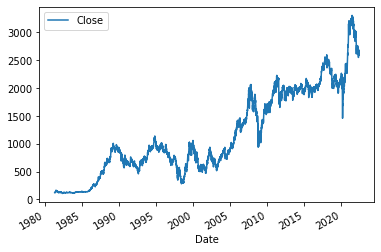

In [ ]:
#데이터 확인
print(data_arima.head())
data_arima.plot()
plt.show()

In [ ]:
##ARIMA 모델링 라이브러리 로드
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

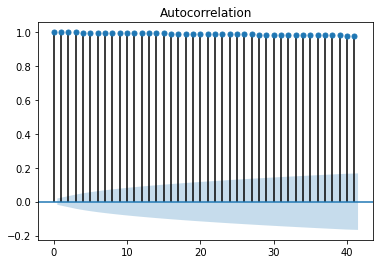

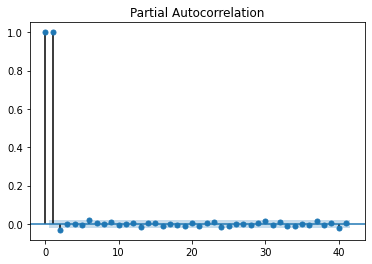

In [ ]:
#모수추정 (ACF Plot, PACF Plot)
plot_acf(data_arima)
plot_pacf(data_arima)
plt.show()

ACF는 변동을 확인할수 없고, PACF는 2번째 시점부터 0에 수렴함을 확인.

자기상관계수 변동을 자세히 확인하기위해 날짜 범위 분할 BoxPlot 진행



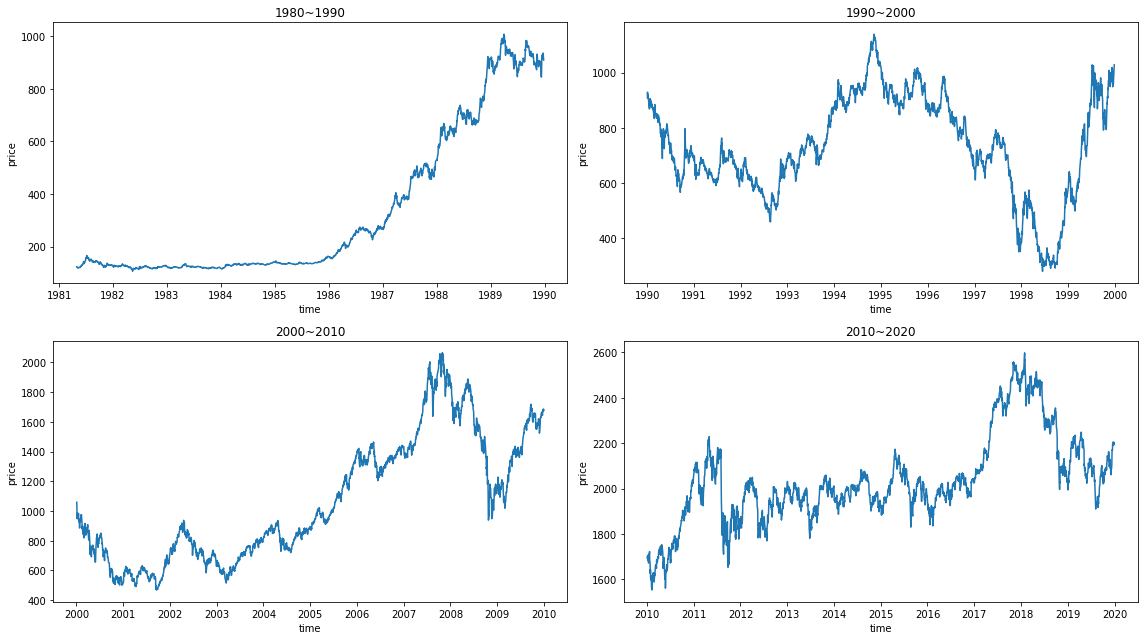

In [ ]:
time_steps = [['1980', '1990'],
              ['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2020']] #TimeStep 정의
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = data_arima.loc[(data_arima.index > time_steps[i][0]) & (data_arima.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [ ]:
print(data.describe())

              Close          Open          High           Low        Volume  \
count  10967.000000  10967.000000  10967.000000  10967.000000  1.096700e+04   
mean    1114.333348   1114.795811   1120.654535   1107.666085  2.545807e+08   
std      769.184203    769.671416    773.382542    764.633285  2.940720e+08   
min      105.990000    105.990000    105.990000    105.990000  1.660000e+05   
25%      584.735000    584.955000    587.925000    579.465000  1.183000e+07   
50%      876.010000    875.990000    879.980000    871.670000  2.230700e+08   
75%     1881.900000   1883.695000   1894.830000   1868.895000  4.018000e+08   
max     3305.210000   3305.460000   3316.080000   3295.440000  3.460000e+09   

             Change  
count  10967.000000  
mean       0.000385  
std        0.014561  
min       -0.120200  
25%       -0.006300  
50%        0.000300  
75%        0.007200  
max        0.119500  


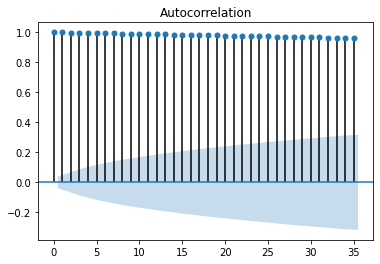

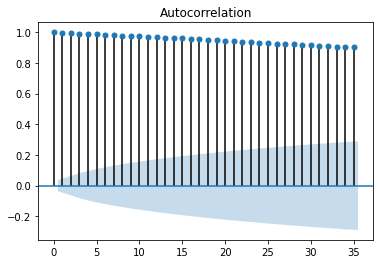

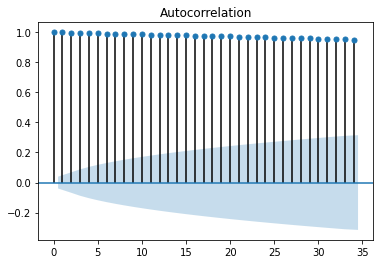

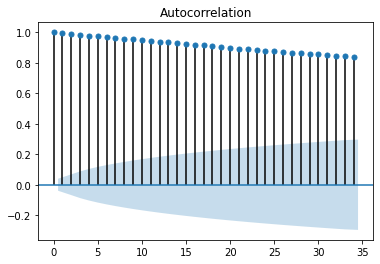

In [ ]:
#ACF 확인
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = data_arima.loc[(data_arima.index > time_steps[i][0]) & (data_arima.index < time_steps[i][1])]
    plot_acf(df)
plt.show()

매우 약간씩 감소하는 추세 확인 >> p = 0 or 1

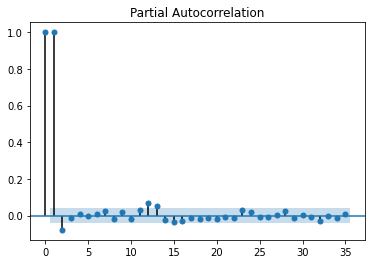

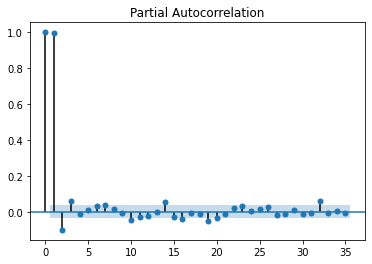

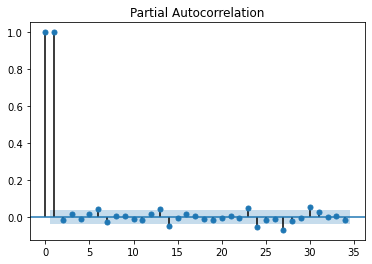

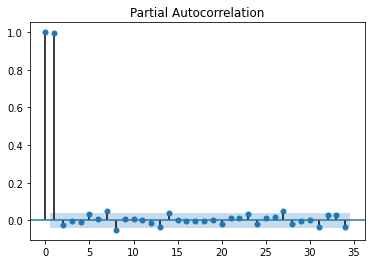

In [ ]:
#PACF 확인
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = data_arima.loc[(data_arima.index > time_steps[i][0]) & (data_arima.index < time_steps[i][1])]
    plot_pacf(df)
plt.show()

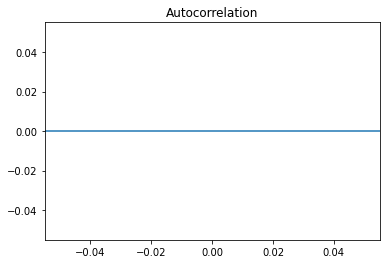

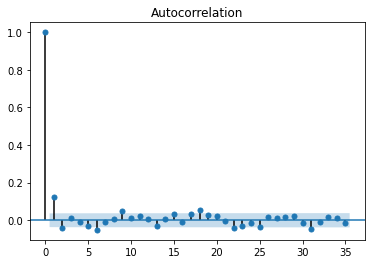

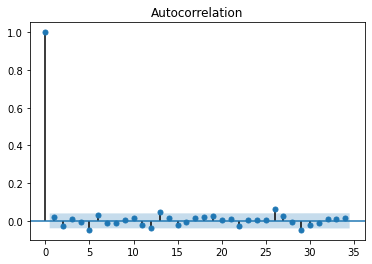

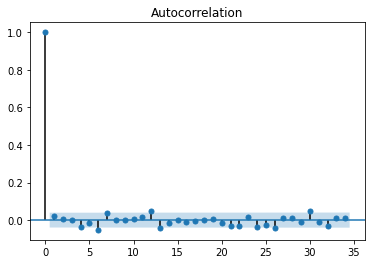

In [ ]:
#1차 차분
data_arima_diff = data_arima.diff()
#ACF확인
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = data_arima_diff.loc[(data_arima.index > time_steps[i][0]) & (data_arima.index < time_steps[i][1])]
    plot_acf(df)
plt.show()

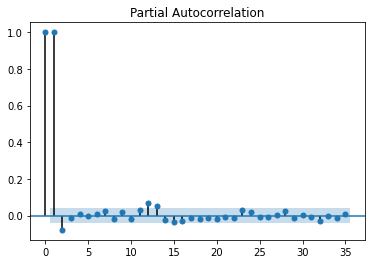

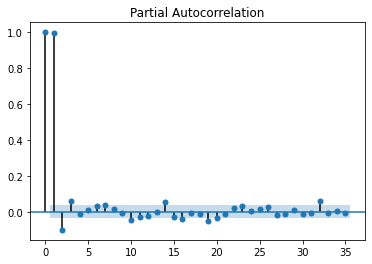

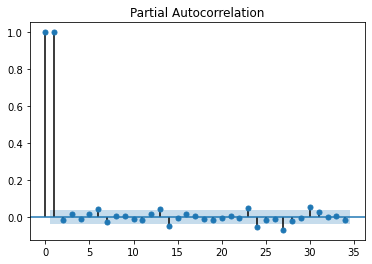

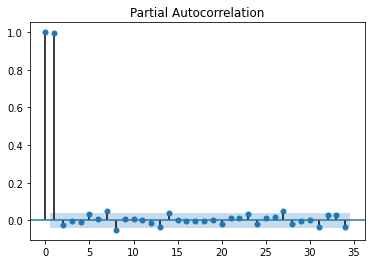

In [ ]:
#PACF 확인
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = data_arima.loc[(data_arima.index > time_steps[i][0]) & (data_arima.index < time_steps[i][1])]
    plot_pacf(df)
plt.show()

차분 결과, 차분이 정상성을 만족하지 않으므로 ARIMA(2,0,0) 모델을 사용해야함. >> ##AR(2) 자기상관모형

In [ ]:
##ARIMA 모델
model = ARIMA(data_arima, order=(2,0,0))
model_fit = model.fit(trend='nc',full_output=True)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                10967
Model:                     ARMA(2, 0)   Log Likelihood              -45903.241
Method:                       css-mle   S.D. of innovations             15.898
Date:                Fri, 10 Jun 2022   AIC                          91812.482
Time:                        04:20:44   BIC                          91834.390
Sample:                             0   HQIC                         91819.864
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Close     1.0340      0.000   2975.275      0.000       1.033       1.035
ar.L2.Close    -0.0341      0.000    -98.019      0.000      -0.035      -0.033
                                    Roots       

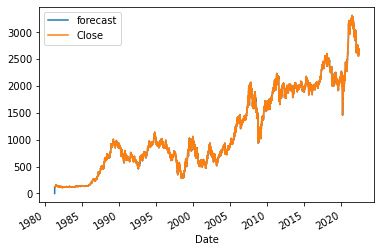

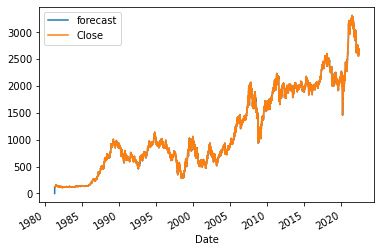

In [ ]:
model_fit.plot_predict()

### LSTM,GRU 모형 모델링





In [7]:
#라이브러리 로드
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
#데이터 준비
x = data_scaled
y = data['Close']
print(x.head())

                Open      High       Low    Volume    Change
Date                                                        
1981-05-01  0.005504  0.005486  0.005521  0.000914  0.542345
1981-05-02  0.005473  0.005455  0.005490  0.000542  0.498123
1981-05-04  0.004566  0.004551  0.004581  0.000510  0.403421
1981-05-06  0.004598  0.004582  0.004612  0.000440  0.504798
1981-05-07  0.004160  0.004146  0.004173  0.000380  0.453066


In [9]:
#x > 정규화 완료, y > 1+log() 변환 진행
y = np.log1p(y)
print(y.head())

Date
1981-05-01    4.825109
1981-05-02    4.824306
1981-05-04    4.800737
1981-05-06    4.801559
1981-05-07    4.789989
Name: Close, dtype: float64


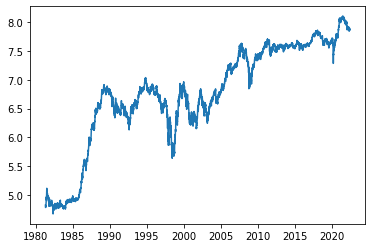

In [18]:
#로그변환 시각화
plt.plot(y)
plt.show()

In [10]:
#3D Input Dataset 세팅
def make_dataset(data, label, window_size): #Window_Size에 따른 3차원 Input 배열 Return Function
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

TEST_SIZE = 1000 #TEST SIZE 설정
WINDOW_SIZE = 20 #WINDOW_SIZE 설정
train_x = x[:-TEST_SIZE]
test_x = x[-TEST_SIZE:]
train_y = y[:-TEST_SIZE]
test_y = y[-TEST_SIZE:]

x_train, y_train = make_dataset(train_x, train_y, 20)
x_test, y_test = make_dataset(test_x, test_y, 20)
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(9947, 20, 5) (9947, 1)
(980, 20, 5) (980, 1)


In [11]:
#Sequential 모델 정의
BATCH_SIZE = 16
model = Sequential()
model.add(tf.keras.layers.LSTM(16, 
               input_shape=(WINDOW_SIZE,5), 
               activation='tanh', 
               )
          )
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1))
Loss = Huber() #Loss
optimizer = Adam(0.0005) #옵티마이저
model.compile(loss = Loss, optimizer = optimizer, metrics = 'mae' )
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1408      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model 학습
history = model.fit(x_train, y_train, epochs = 50, callbacks = [early_stop], shuffle = False, validation_split = 0.2, batch_size = BATCH_SIZE)

Epoch 1/50
498/498 [==============================] - 10s 12ms/step - loss: 1.2559 - mae: 1.6696 - val_loss: 0.0897 - val_mae: 0.4170
Epoch 2/50
498/498 [==============================] - 5s 10ms/step - loss: 0.4320 - mae: 0.7987 - val_loss: 0.0649 - val_mae: 0.3535
Epoch 3/50
498/498 [==============================] - 5s 9ms/step - loss: 0.3694 - mae: 0.7272 - val_loss: 0.0837 - val_mae: 0.4041
Epoch 4/50
498/498 [==============================] - 6s 11ms/step - loss: 0.3234 - mae: 0.6760 - val_loss: 0.0486 - val_mae: 0.3064
Epoch 5/50
498/498 [==============================] - 5s 9ms/step - loss: 0.2902 - mae: 0.6302 - val_loss: 0.0738 - val_mae: 0.3806
Epoch 6/50
498/498 [==============================] - 5s 9ms/step - loss: 0.2557 - mae: 0.5886 - val_loss: 0.0597 - val_mae: 0.3424
Epoch 7/50
498/498 [==============================] - 5s 10ms/step - loss: 0.2299 - mae: 0.5541 - val_loss: 0.0469 - val_mae: 0.3034
Epoch 8/50
498/498 [==============================] - 5s 10ms/step - lo

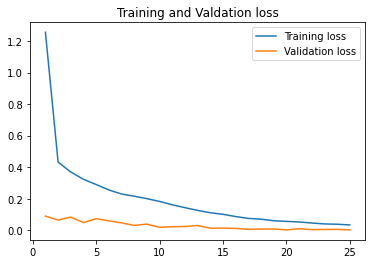

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred.shape

(980, 1)

In [ ]:
mse, mae = model.evaluate(x_test,y_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - mae: 0.0463


In [ ]:
real = np.concatenate((y_train,y_test))
forecast = np.concatenate((y_train,y_pred))

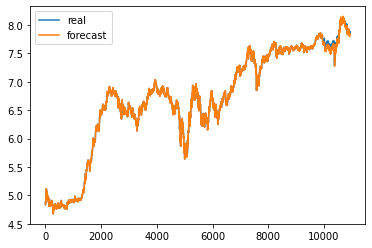

In [ ]:
plt.plot(real, label = 'real')
plt.plot(forecast, label = 'forecast')
plt.legend()

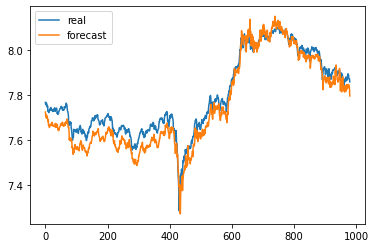

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(y_pred, label = 'forecast')
plt.legend()

In [ ]:
##GRU 모델링
BATCH_SIZE_2 = 16
model2 = Sequential()
model2.add(GRU(16, 
               input_shape=(WINDOW_SIZE,5), 
               activation='tanh', 
               )
          )
model2.add(Dropout(0.2))
model2.add(Dense(4, activation = 'relu'))
model2.add(Dense(1))
Loss2 = Huber() #Loss
optimizer2 = Adam(0.0005) #옵티마이저
model2.compile(loss = Loss2, optimizer = optimizer2, metrics = 'mae' )
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 16)                1104      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,177
Trainable params: 1,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model 학습
history2 = model2.fit(x_train, y_train, epochs = 50, callbacks = [early_stop], shuffle = False, validation_split = 0.2, batch_size = BATCH_SIZE_2)

Epoch 1/50
498/498 [==============================] - 8s 11ms/step - loss: 1.6849 - mae: 2.1110 - val_loss: 0.1101 - val_mae: 0.4627
Epoch 2/50
498/498 [==============================] - 5s 10ms/step - loss: 0.4010 - mae: 0.7655 - val_loss: 0.0750 - val_mae: 0.3812
Epoch 3/50
498/498 [==============================] - 5s 10ms/step - loss: 0.3273 - mae: 0.6761 - val_loss: 0.0690 - val_mae: 0.3678
Epoch 4/50
498/498 [==============================] - 5s 10ms/step - loss: 0.2737 - mae: 0.6104 - val_loss: 0.0307 - val_mae: 0.2442
Epoch 5/50
498/498 [==============================] - 5s 10ms/step - loss: 0.2606 - mae: 0.5937 - val_loss: 0.0286 - val_mae: 0.2373
Epoch 6/50
498/498 [==============================] - 5s 10ms/step - loss: 0.2478 - mae: 0.5760 - val_loss: 0.0168 - val_mae: 0.1816
Epoch 7/50
498/498 [==============================] - 5s 10ms/step - loss: 0.2210 - mae: 0.5393 - val_loss: 0.0095 - val_mae: 0.1365
Epoch 8/50
498/498 [==============================] - 6s 13ms/step - 

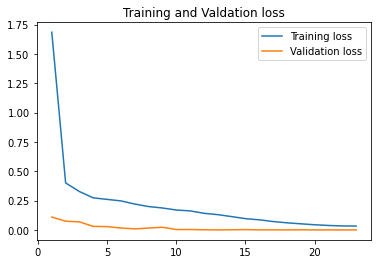

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2)+1)
plt.figure()
plt.plot(epochs2, loss2, label='Training loss')
plt.plot(epochs2, val_loss2, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show()

In [ ]:
y_pred2 = model.predict(x_test)
y_pred2.shape

(980, 1)

In [ ]:
real2 = np.concatenate((y_train,y_test))
forecast2 = np.concatenate((y_train,y_pred2))

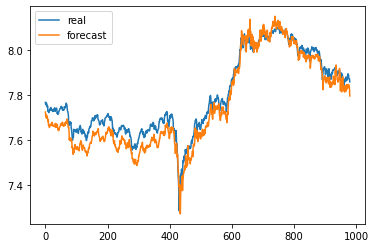

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(y_pred2, label = 'forecast')
plt.legend()

In [ ]:
mse, mae = model2.evaluate(x_test,y_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.0094 - mae: 0.1158


In [ ]:
real = np.concatenate((y_train,y_test))
forecast = np.concatenate((y_train,y_pred2))

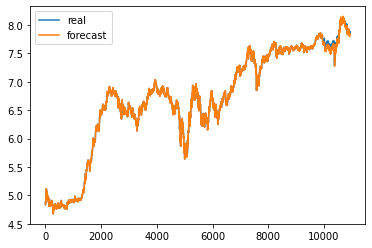

In [ ]:
plt.plot(real, label = 'real')
plt.plot(forecast, label = 'forecast')
plt.legend()

### Random & Grid Search 를 통한 하이퍼파라미터 튜닝

In [12]:
#Modeling 함수 정의

def build_model(n_hidden, dropout_rate, learn_rate, n_input_neurons, input_layer):
    models = Sequential()
    models.add(input_layer(n_input_neurons, input_shape = (20,5),dropout=dropout_rate))                                            
    for layer in range(n_hidden):
      models.add(Dense(4))
    models.add(Dense(4, activation = 'relu'))
    models.add(Dense(1))
    optim = Adam(learn_rate)
    losses = Huber()
    models.compile(loss = losses, optimizer = optim, metrics = ['mae'])

    return models

In [13]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

pram_dic = { ##조정할 하이퍼 파라미터 그리드설정
    'n_hidden' : [0,1,2,3,4,5,6],
    'dropout_rate' : [0.1,0.2,0.3,0.4,0.5],
    'learn_rate' : [0.005,0.0001,0.0005],
    'n_input_neurons' : [16,32,64,128],
    'input_layer' : [LSTM, GRU],
}

keras_model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn = build_model)


In [ ]:
#RandomSearch
#rnd_search_cv = RandomizedSearchCV(keras_model, pram_dic, n_iter = 10)

In [ ]:
#Search Start
#rnd_search_cv.fit(x_train, y_train, epochs = 30,
                  validation_split = 0.2,
                  callbacks = [early_stop])

Epoch 1/30
199/199 [==============================] - 5s 14ms/step - loss: 5.0134 - mae: 5.5134 - val_loss: 1.8976 - val_mae: 2.3976
Epoch 2/30
199/199 [==============================] - 2s 11ms/step - loss: 0.1232 - mae: 0.3760 - val_loss: 0.3380 - val_mae: 0.8182
Epoch 3/30
199/199 [==============================] - 2s 11ms/step - loss: 0.0749 - mae: 0.3013 - val_loss: 0.2474 - val_mae: 0.7000
Epoch 4/30
199/199 [==============================] - 2s 12ms/step - loss: 0.0343 - mae: 0.1943 - val_loss: 0.0058 - val_mae: 0.1004
Epoch 5/30
199/199 [==============================] - 2s 11ms/step - loss: 0.0035 - mae: 0.0651 - val_loss: 0.0011 - val_mae: 0.0323
Epoch 6/30
199/199 [==============================] - 2s 11ms/step - loss: 0.0031 - mae: 0.0619 - val_loss: 0.0019 - val_mae: 0.0507
Epoch 7/30
199/199 [==============================] - 2s 11ms/step - loss: 0.0029 - mae: 0.0603 - val_loss: 0.0015 - val_mae: 0.0438
Epoch 8/30
199/199 [==============================] - 2s 12ms/step - 

KeyboardInterrupt: ignored

In [ ]:
#최적 파라미터 확인
rnd_search_cv.best_params_

In [ ]:
#best score 확인
rnd_search_cv.best_score_

In [16]:
#GridSearch
grd_search_cv = GridSearchCV(keras_model,param_grid = pram_dic)

In [17]:
grd_search_cv.fit(x_train, y_train, epochs = 30,
                  validation_split = 0.2,
                  callbacks = [early_stop])

63/63 [==============================] - 1s 10ms/step - loss: 5.9393 - mae: 6.4393
Epoch 1/30
110/199 [===============>..............] - ETA: 2s - loss: 2.8486 - mae: 3.2740

KeyboardInterrupt: ignored

### AdaBoost를 이용한 Ensemble 모형 구축

In [ ]:
def make_keras_model():
  models = Sequential()
  models.add(GRU(16, 
               input_shape=(20,5), 
               activation='tanh', 
               )
          )
  models.add(Dropout(0.2))
  models.add(Dense(4, activation = 'relu'))
  models.add(Dense(1))
  Loss = Huber() #Loss
  optimizer = Adam(0.0005) #옵티마이저
  models.compile(loss = Loss, optimizer = optimizer, metrics = 'mae' )
  return models

from sklearn.ensemble import AdaBoostRegressor
ensemble_model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn = make_keras_model, epochs = 50, batch_size = 16, callbacks = [early_stop], validation_split = 0.2)
ensemble = AdaBoostRegressor(ensemble_model,n_estimators=10,
                         learning_rate=1, random_state = 0, loss = 'linear')

In [ ]:
histrory_ensemble = ensemble.fit(x_train,y_train)

Epoch 1/50
498/498 [==============================] - 8s 11ms/step - loss: 1.7928 - mae: 2.2173 - val_loss: 0.1958 - val_mae: 0.5609
Epoch 2/50
498/498 [==============================] - 6s 11ms/step - loss: 0.3176 - mae: 0.6652 - val_loss: 0.0229 - val_mae: 0.2037
Epoch 3/50
498/498 [==============================] - 5s 11ms/step - loss: 0.2770 - mae: 0.6160 - val_loss: 0.0175 - val_mae: 0.1776
Epoch 4/50
498/498 [==============================] - 6s 11ms/step - loss: 0.2549 - mae: 0.5829 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 5/50
498/498 [==============================] - 5s 11ms/step - loss: 0.2343 - mae: 0.5566 - val_loss: 0.0206 - val_mae: 0.1927
Epoch 6/50
498/498 [==============================] - 5s 10ms/step - loss: 0.2239 - mae: 0.5408 - val_loss: 0.0029 - val_mae: 0.0531
Epoch 7/50
498/498 [==============================] - 5s 11ms/step - loss: 0.1997 - mae: 0.5071 - val_loss: 0.0048 - val_mae: 0.0920
Epoch 8/50
498/498 [==============================] - 5s 10ms/step - 

In [ ]:
y_pred_en = ensemble.predict(x_test)

In [ ]:
ensemble.score(x_test, y_test)

0.9773149254016469

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_en)

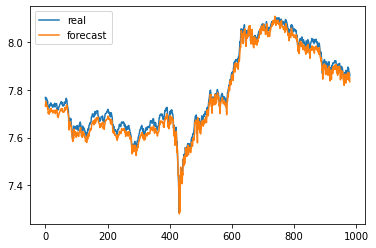

In [ ]:
plt.plot(y_test, label = 'real')
plt.plot(y_pred_en, label = 'forecast')
plt.legend()

### 학습된 모델로 KOSDAQ 종가 예측

In [ ]:
kosdaq_data = fdr.DataReader('KQ11')

In [ ]:
print(kosdaq_data.head())

            Close   Open   High    Low    Volume  Change
Date                                                    
2001-01-02  557.0  502.5  559.6  502.5  201210.0  0.0593
2001-01-03  569.0  545.8  579.9  539.3  284990.0  0.0215
2001-01-04  615.1  617.7  621.5  609.0  233130.0  0.0810
2001-01-05  625.2  614.5  630.7  602.5  367230.0  0.0164
2001-01-08  650.0  614.9  657.0  614.0  358620.0  0.0397


In [ ]:
#데이터 정규화
scaler2 = MinMaxScaler()
scaled_col = ['Open','High','Low','Volume','Change']
index = kosdaq_data.index
data_scaled_kq11 = pd.DataFrame(scaler2.fit_transform(kosdaq_data[scaled_col]), 
                                                index = index, 
                                            columns = scaled_col)
print(data_scaled_kq11)

                Open      High       Low    Volume    Change
Date                                                        
2001-01-02  0.313084  0.363489  0.317600  0.000015  0.761001
2001-01-03  0.366309  0.389206  0.362999  0.000031  0.597929
2001-01-04  0.454691  0.441908  0.448987  0.000021  0.854616
2001-01-05  0.450757  0.453563  0.440968  0.000048  0.575928
2001-01-08  0.451249  0.486882  0.455156  0.000046  0.676445
...              ...       ...       ...       ...       ...
2022-06-03  0.798112  0.793476  0.795899  0.236667  0.506903
2022-06-07  0.788266  0.780908  0.774791  0.220888  0.419327
2022-06-08  0.774376  0.770317  0.775432  0.264282  0.510785
2022-06-09  0.768783  0.765820  0.767524  0.000220  0.515962
2022-06-10  0.763718  0.759372  0.765995  0.000208  0.469370

[5300 rows x 5 columns]


In [ ]:
TEST_SIZE_KOSDAQ = 500 #TEST SIZE 설정
WINDOW_SIZE_KOSDAQ = 20 #WINDOW_SIZE 설정
kq_train_x = x[:-TEST_SIZE]
kq_test_x = x[-TEST_SIZE:]
kq_train_y = y[:-TEST_SIZE]
kq_test_y = y[-TEST_SIZE:]

In [ ]:
x_train_kq, y_train_kq = make_dataset(kq_train_x, kq_train_y, 20)
x_test_kq, y_test_kq = make_dataset(kq_test_x, kq_test_y, 20)
y_test_kq = y_test_kq.reshape(-1,1)
y_train_kq = y_train_kq.reshape(-1,1)

In [ ]:
kq_y_pred = ensemble.predict(x_test_kq)

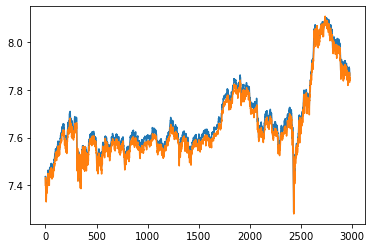

In [ ]:
plt.plot(y_test_kq, label = 'real')
plt.plot(kq_y_pred, label = 'forecast')
plt.show()

In [ ]:
print(y_test_kq - kq_y_pred)

[[ 0.03609715  0.00357113  0.01715717 ... -0.40348902 -0.41775122
  -0.39852276]
 [ 0.03671621  0.00419019  0.01777624 ... -0.40286995 -0.41713215
  -0.39790369]
 [ 0.01036762 -0.02215839 -0.00857235 ... -0.42921854 -0.44348074
  -0.42425228]
 ...
 [ 0.47397189  0.44144587  0.45503192 ...  0.03438573  0.02012353
   0.03935199]
 [ 0.4737016   0.44117558  0.45476163 ...  0.03411543  0.01985324
   0.03908169]
 [ 0.46049434  0.42796833  0.44155437 ...  0.02090818  0.00664598
   0.02587444]]
